# Section C: Machine Learning (FULL SOLUTIONS)

This section is composed of 6 parts with a total of 40 marks. You will be given empty code cells and the expected output. The final submission will be this Jupyter notebook with the code filled in.

1. Use Pandas to Read the Dataset (4 marks)
2. Descriptive Statistics and Data Cleaning (18 marks) 
3. Data Prep (4 marks) 
4. Features separation (4 marks) 
5. Training models (6 marks)  
6. Weight of features of best model (2 marks)
7. Visualization of features weight (2 marks)

## Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q1. Use Pandas to Read the Dataset (4 marks)

1. Use pandas to read the csv file bank-additional-mod.csv into a dataframe called "bank". Print out the shape of "bank".(2 marks)
2. Print the first 15 rows and 11 columns of the dataframe "bank". (1 mark) *(Hint: use bank.iloc[all rows,start to column 11].head(15))*
3. Print the first 15 rows and last 11 columns of the dataframe "bank". (1 mark) *(Hint: use bank.iloc[all rows,column 12 to end].head(15))*

In [167]:
# Read data


(41188, 21)

In [168]:
# Print the first 15 rows and 11 columns of the dataframe "bank".


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0 - 500
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,0 - 500
2,37,services,married,high.school,no,yes,no,telephone,may,mon,0 - 500
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,0 - 500
4,56,services,married,high.school,no,no,yes,telephone,may,mon,0 - 500
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,0 - 500
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,0 - 500
7,41,blue-collar,married,(,NaN,no,no,telephone,may,mon,0 - 500
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,0 - 500
9,25,services,single,high.school,no,yes,no,telephone,may,mon,0 - 500


In [169]:
# Print the first 15 rows and last 11 columns of the dataframe "bank".


,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Q2. Descriptive Statistics and Data Cleaning (20 marks)

*In this step, you will perform data cleaning of the raw data. The final cleansed data is saved in the file **"bank-additional-cleansed.csv"**. If you wish to, you can import the cleansed data into the Jupyter notebook to do Q3 first.*

1. Print out a bar chart of the count of values in the "job" column. (1 mark) 

2. Drop the rows that have the value "unknown" in the following columns and update the "bank" dataframe. Print out the shape of the updated "bank" dataframe. Columns: "job", "marital", "housing", "loan". (1 mark)

3. The "education" column contains unknowns in the form of the "(" character. Drop the rows with this character in the "education" column. Print out the shape of the updated "bank" dataframe. (2 marks)

4. The "default" column has blank cells. Replace the blank cells with "unknown". Print out the first 15 rows and 11 columns of the updated "bank" dataframe. *Hint: use df.replace() and the fact that NaN values can be identified with np.nan* (2 marks)

5. Print out the value counts of the unique values in the "default" column. Change all values of "unknown" and "yes" to a new value "possible" in the "default" column. Print out the value counts of the unique values in the updated "default" column. (2 marks)

6. Delete the columns 'duration', 'month', 'day_of_week', 'pdays', 'nr.employed'. Print out the shape of the updated "bank" dataframe. (1 mark)

7. Using the Counter function in the collections library, print out the unique values and their counts in the "campaign" column. There are too many unique values in the "campaign" column. Group all values in the "campaign" column that are less than or equal to 1 as "camp1", group all values in the "campaign" column that are more than 1 but less than or equal to 2 as "camp2", group all other values as "camp3". Print out the unique values and their counts in the updated "campaign" column. (2 marks)

8. Print out the unique values and their counts in the "previous" column. The majority of the values in "previous" has the value 0. Change all non-zero values to 1. Print out the unique values and their counts in the updated "previous" column. (1 mark)

9. The column "emp.var.rate" contains too many unique values. Group all values in the "emp.var.rate" column that are less than -2.5 to "rate1", group all values in the "emp.var.rate" column that are more than or equal to -2.5 but less than -1 as "rate2", group all values in the "emp.var.rate" column that are more than or equal to -1 but less than 1.2 as "rate3", group all other values as "rate4". Print out the unique values and their counts in the updated "emp.var.rate" column. (2 marks)

10. The column "cons.price.idx" contains too many unique values. Group all values in the "cons.price.idx" column that are less than 92.9 to "price1", group all values in the "cons.price.idx" column that are more than or equal to 92.9 but less than 93.4 as "price2", group all values in the "cons.price.idx" column that are more than or equal to 93.4 but less than 93.9 as "price3", group all values in the "cons.price.idx" column that are more than or equal to 93.9 but less than 94 as "price4", group all other values as "price5". Print out the unique values and their counts in the updated "cons.price.idx" column. (2 marks)

11. The column "cons.conf.idx" contains too many unique values. Group all values in the "cons.conf.idx" column that are less than -46 to "conf1", group all values in the "cons.conf.idx" column that are more than or equal to -46 but less than -41.8 as "conf2", group all values in the "cons.conf.idx" column that are more than or equal to -41.8 but less than 36.3 as "conf3", group all other values as "conf4". Print out the unique values and their counts in the updated "cons.conf.idx" column. (2 marks)

12. The column "emp.var.rate" contains too many unique values. Group all values in the "euribor3m" column that are less than 1.3 to "emp1", group all values in the "euribor3m" column that are more than or equal to 1.3 but less than 4.2 as "emp2", group all values in the "euribor3m" column that are more than or equal to 4.2 but less than 4.96 as "emp3", group all other values as "emp4". Print out the unique values and their counts in the updated "emp.var.rate" column. (2 marks)

13. Print out the first 15 rows of "bank" to check. 


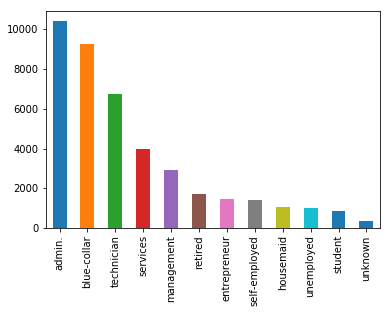

In [170]:
# Print out a bar chart of the count of values in the "job" column


In [171]:
# Drop the rows that have the value "unknown" in the following columns and update the "bank" dataframe. Print out the shape of the updated "bank" dataframe.
# Columns: "job", "marital", "housing", "loan"


(39803, 21)

In [172]:
# The "education" column contains unknowns in the form of the "(" character. 
# Drop the rows with this character in the "education" column. 
# Print out the shape of the updated "bank" dataframe.


(38245, 21)

In [173]:
# The "default" column has blank cells. Replace the blank cells with "unknown" 
# Print out the first 15 rows and 11 columns of the updated "bank" dataframe. 
# Hint: use df.replace() and the fact that NaN values can be identified with np.nan


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0 - 500
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,0 - 500
2,37,services,married,high.school,no,yes,no,telephone,may,mon,0 - 500
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,0 - 500
4,56,services,married,high.school,no,no,yes,telephone,may,mon,0 - 500
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,0 - 500
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,0 - 500
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,0 - 500
9,25,services,single,high.school,no,yes,no,telephone,may,mon,0 - 500
11,25,services,single,high.school,no,yes,no,telephone,may,mon,0 - 500


In [174]:
# Print out the value counts of the unique values in the "default" column


no         30485
unknown     7757
yes            3
Name: default, dtype: int64

In [175]:
# Change all values of "unknown" and "yes" to a new value "possible" in the "default" column
# Print out the value counts of the unique values in the updated "default" column


no          30485
possible     7760
Name: default, dtype: int64

In [176]:
# Delete the columns 'duration', 'month', 'day_of_week', 'pdays', 'nr.employed'. 
# Print out the shape of the updated "bank" dataframe.


(38245, 16)

In [177]:
# Using the Counter function in the collections library, print out the unique values and their counts in the "campaign" column 


Counter({1: 16375,
         2: 9818,
         3: 4956,
         4: 2463,
         5: 1502,
         6: 911,
         7: 584,
         8: 372,
         9: 258,
         10: 207,
         11: 166,
         12: 115,
         13: 76,
         18: 31,
         23: 16,
         14: 64,
         22: 17,
         25: 7,
         16: 45,
         17: 54,
         15: 47,
         19: 23,
         20: 30,
         39: 1,
         35: 5,
         42: 2,
         28: 8,
         26: 7,
         27: 11,
         32: 4,
         21: 19,
         24: 15,
         29: 9,
         31: 7,
         30: 7,
         41: 1,
         37: 1,
         40: 2,
         33: 4,
         34: 3,
         43: 2})

In [178]:
# There are too many unique values in the "campaign" column. 
# Group all values in the "campaign" column that are less than or equal to 1 as "camp1",
# group all values in the "campaign" column that are more than 1 but less than or equal to 2 as "camp2",
# group all other values as "camp3".
# Print out the unique values and their counts in the updated "campaign" column


Counter({'camp1': 16375, 'camp2': 9818, 'camp3': 12052})

In [179]:
# Print out the unique values and their counts in the "previous" column


Counter({0: 33066, 1: 4234, 2: 672, 3: 195, 4: 57, 5: 16, 6: 4, 7: 1})

In [180]:
# The majority of the values in "previous" has the value 0.
# Change all non-zero values to 1
# Print out the unique values and their counts in the updated "previous" column


Counter({0: 33066, 1: 5179})

In [181]:
# The column "emp.var.rate" contains too many unique values.
# Group all values in the "emp.var.rate" column that are less than -2.5 to "rate1",
# group all values in the "emp.var.rate" column that are more than or equal to -2.5 but less than -1 as "rate2",
# group all values in the "emp.var.rate" column that are more than or equal to -1 but less than 1.2 as "rate3",
# group all other values as "rate4".
# Print out the unique values and their counts in the updated "emp.var.rate" column


Counter({'rate3': 10632, 'rate4': 15100, 'rate2': 9895, 'rate1': 2618})

In [182]:
# The column "cons.price.idx" contains too many unique values.
# Group all values in the "cons.price.idx" column that are less than 92.9 to "price1",
# group all values in the "cons.price.idx" column that are more than or equal to 92.9 but less than 93.4 as "price2",
# group all values in the "cons.price.idx" column that are more than or equal to 93.4 but less than 93.9 as "price3",
# group all values in the "cons.price.idx" column that are more than or equal to 93.9 but less than 94 as "price4",
# group all other values as "price5".
# Print out the unique values and their counts in the updated "cons.price.idx" column


Counter({'idx4': 13295,
         'idx5': 5260,
         'idx3': 5318,
         'idx2': 6610,
         'idx1': 7762})

In [183]:
# The column "cons.conf.idx" contains too many unique values.
# Group all values in the "cons.conf.idx" column that are less than -46 to "conf1",
# group all values in the "cons.conf.idx" column that are more than or equal to -46 but less than -41.8 as "conf2",
# group all values in the "cons.conf.idx" column that are more than or equal to -41.8 but less than 36.3 as "conf3",
# group all other values as "conf4".
# Print out the unique values and their counts in the updated "cons.conf.idx" column


Counter({'conf3': 12949, 'conf2': 9654, 'conf4': 7277, 'conf1': 8365})

In [184]:
# The column "emp.var.rate" contains too many unique values.
# Group all values in the "euribor3m" column that are less than 1.3 to "emp1",
# group all values in the "euribor3m" column that are more than or equal to 1.3 but less than 4.2 as "emp2",
# group all values in the "euribor3m" column that are more than or equal to 4.2 but less than 4.96 as "emp3",
# group all other values as "emp4".
# Print out the unique values and their counts in the updated "emp.var.rate" column


Counter({'emp3': 10466, 'emp4': 11856, 'emp2': 7973, 'emp1': 7950})

In [185]:
# Print out the first 15 rows of "bank" to check


,age,job,marital,education,default,housing,loan,contact,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no
1,57,services,married,high.school,possible,no,no,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no
2,37,services,married,high.school,no,yes,no,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no
3,40,admin.,married,basic.6y,no,no,no,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no
4,56,services,married,high.school,no,no,yes,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no
5,45,services,married,basic.9y,possible,no,no,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no
6,59,admin.,married,professional.course,no,no,no,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no
8,24,technician,single,professional.course,no,yes,no,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no
9,25,services,single,high.school,no,yes,no,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no
11,25,services,single,high.school,no,yes,no,telephone,camp1,0,nonexistent,rate3,idx4,conf3,emp3,no


# Q3. Data Prep (4 marks)

*Note: Use **"bank-additional-cleansed.csv"** to commence this portion if you have not attempted Q2.*

1. Convert the categorical values in the "bank" dataframe to dummy variables. Do NOT convert "age", "previous" and "y". Print out the shape of bank after each transformation (4 marks)

In [186]:
# Print all the column names of the dataframe "bank"


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [187]:
# Convert the categorical values in the "bank" dataframe to dummy variables. 
# Do NOT convert "age", "previous" and "y"
# Print out the shape of bank after each transformation


(38245, 26)
(38245, 28)
(38245, 34)
(38245, 35)
(38245, 36)
(38245, 37)
(38245, 38)
(38245, 40)
(38245, 42)
(38245, 45)
(38245, 49)
(38245, 52)
(38245, 55)


# Q4. Features separation (3 marks)

1. Put into a variable "x" all the values in all but the column "Incomes".  (1 mark)
2. Put into a variable "y" all the values in the column "Incomes".  (1 mark)
3. Print out the first 5 rows and shapes of both x and y. (1 mark)

In [147]:
# Put into a variable "x" all the values in all but the column "y". 
# Put into a variable "y" all the values in the column "y". 
# Print out the first 5 rows and shapes of both x and y. 


   age  previous  admin.  blue-collar  entrepreneur  housemaid  management  \
0   56         0       0            0             0          1           0   
1   57         0       0            0             0          0           0   
2   37         0       0            0             0          0           0   
3   40         0       1            0             0          0           0   
4   56         0       0            0             0          0           0   

   retired  self-employed  services  ...   idx4  idx5  conf1  conf2  conf3  \
0        0              0         0  ...      1     0      0      0      1   
1        0              0         1  ...      1     0      0      0      1   
2        0              0         1  ...      1     0      0      0      1   
3        0              0         0  ...      1     0      0      0      1   
4        0              0         1  ...      1     0      0      0      1   

   conf4  emp1  emp2  emp3  emp4  
0      0     0     0     1 

# Q5. Training models (3 marks)

1. Run code given as is.
2. Do a split-validation of features "x" and labels "y". Use a random_state of 111. Score the models using accuracy_score, saving the mean into a variable "scores". Save also the name of the models under a variable "names". Print out "scores" and "names. (2 marks)
4. Compare the accuracy of the models, sorting your answer in descending order of score. (1 mark)

In [148]:
# Run the following code as is.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\jasonc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [149]:
# Run the following code as is.
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [150]:
# Run the following code as is.
# Import train_test_split and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [152]:
# Do a split-validation of features "x" and labels "y". Use a random_state of 111. 


In [153]:
# Score the models using accuracy_score, saving the mean into a variable "scores". 
# Save also the name of the models under a variable "names". Print out "scores" and "names.


In [156]:
# Compare the accuracy of the models, sorting your answer in descending order of score.


  Name     Score
6   GB  0.904622
2   LR  0.902845
1  SVM  0.900858
0  KNN  0.892387
5   RF  0.883811
3   DT  0.848358
4  GNB  0.802029


# Q6. Weight of features of best model (4 marks)

1. Create a variable features_weight, containing the name of the feature and the corresponding weight the best model found in Q5 above.  (2 marks)
2. Create a variable selectedFeatures, filtering out the features with importance weights above 0.03.  (2 marks)

In [157]:
# Print out importances of features of best model


array([0.1982842 , 0.00160127, 0.01312647, 0.01278795, 0.00523604,
       0.        , 0.00360931, 0.00030147, 0.00440926, 0.00227869,
       0.00914511, 0.00678492, 0.        , 0.00735399, 0.00261121,
       0.00656342, 0.00659393, 0.0087799 , 0.00854914, 0.00340536,
       0.00833844, 0.00628665, 0.02453027, 0.00921543, 0.00691429,
       0.00751917, 0.00655434, 0.0099177 , 0.00125164, 0.01819218,
       0.01828274, 0.00089357, 0.00211837, 0.00554652, 0.03175593,
       0.00523227, 0.07382167, 0.00751446, 0.06042117, 0.01827546,
       0.00870559, 0.04564186, 0.02916239, 0.04901764, 0.        ,
       0.02350252, 0.05341456, 0.00048893, 0.0122538 , 0.01651547,
       0.04559068, 0.04793329, 0.04309353, 0.00067579])

In [160]:
# Create a variable features_weight, containing the name of the feature and the 
# corresponding weight the best model found in Q5 above. 


[('age', 0.1982842032630798),
 ('previous', 0.0016012735265749519),
 ('admin.', 0.013126472385582049),
 ('blue-collar', 0.01278794843772948),
 ('entrepreneur', 0.005236039338758302),
 ('housemaid', 0.0),
 ('management', 0.0036093123948115736),
 ('retired', 0.00030147427476009676),
 ('self-employed', 0.0044092559386982024),
 ('services', 0.0022786920977906134),
 ('student', 0.00914510560622986),
 ('technician', 0.006784919118293523),
 ('unemployed', 0.0),
 ('divorced', 0.007353987943275366),
 ('married', 0.0026112102028158905),
 ('single', 0.006563424042352946),
 ('basic.4y', 0.006593927113113176),
 ('basic.6y', 0.008779897119294335),
 ('basic.9y', 0.008549143004872924),
 ('high.school', 0.003405362725622867),
 ('illiterate', 0.008338444934163242),
 ('professional.course', 0.006286648658750426),
 ('university.degree', 0.02453027495735955),
 ('no', 0.009215432691004643),
 ('possible', 0.006914288975530741),
 ('no', 0.007519173922952519),
 ('yes', 0.006554341288676586),
 ('no', 0.00991770

In [188]:
#Create a variable selectedFeatures, filtering out the features with importance weights above 0.03.


[('age', 0.1982842032630798),
 ('failure', 0.03175592885507891),
 ('success', 0.07382167103302328),
 ('rate2', 0.060421174086765915),
 ('idx1', 0.04564186180763073),
 ('idx3', 0.04901764005188924),
 ('conf1', 0.05341455823743477),
 ('emp1', 0.04559067574662615),
 ('emp2', 0.04793329413980028),
 ('emp3', 0.04309353434927446)]

# Q7. Visualization of features weight (2 marks)

1. Plot a bar chart showing the weights vs features as contained in selectedFeatures.  (2 marks)

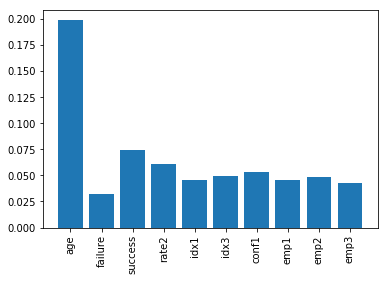

In [164]:
import matplotlib.pyplot as plt


# END OF SECTION C